In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import acf
import yfinance as yf


### Question 1: Evaluate the daily energy intake of 11 women

In [3]:

# Dataset: Daily energy intake (kJ) for 11 women (Altman, 1991)
energy_intake = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

# Null Hypothesis (H0): The population mean energy intake is 7725 kJ
# Alternative Hypothesis (H1): The population mean energy intake is not 7725 kJ
recommended_intake = 7725

def analyze_energy_intake(data, hypothesized_mean):
    """
    Perform comprehensive analysis of energy intake data.
    """
    # Calculate sample statistics
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    n = len(data)
    sem = sample_std / np.sqrt(n)
    df = n - 1
    
    # Calculate t-statistic
    t_statistic = (sample_mean - hypothesized_mean) / sem
    
    # Perform two-tailed t-test
    p_value = stats.t.sf(abs(t_statistic), df) * 2  # Two-tailed p-value
    
    # Determine conclusion
    alpha = 0.05  # Significance level
    if p_value < alpha:
        conclusion = ("Reject the null hypothesis. There is significant evidence to suggest "
                      "that the mean energy intake differs from the recommended value.")
    else:
        conclusion = ("Fail to reject the null hypothesis. There is not sufficient evidence "
                      "to suggest that the mean energy intake differs from the recommended value.")
    
    # Compile results
    results = {
        'Sample Mean (kJ)': round(sample_mean, 2),
        'Sample Standard Deviation (kJ)': round(sample_std, 2),
        'Standard Error of the Mean (kJ)': round(sem, 2),
        'Degrees of Freedom': df,
        't-statistic': round(t_statistic, 2),
        'p-value': round(p_value, 4),
        'Conclusion': conclusion
    }
    
    return results

# Perform analysis
analysis_results = analyze_energy_intake(energy_intake, recommended_intake)

# Print summary
print("\nSummary of Energy Intake Analysis")
print("==================================")
for key, value in analysis_results.items():
    print(f"{key}: {value}")

# Additional insights
mean_difference = analysis_results['Sample Mean (kJ)'] - recommended_intake
percent_difference = (mean_difference / recommended_intake) * 100



Summary of Energy Intake Analysis
Sample Mean (kJ): 6753.64
Sample Standard Deviation (kJ): 1142.12
Standard Error of the Mean (kJ): 344.36
Degrees of Freedom: 10
t-statistic: -2.82
p-value: 0.0181
Conclusion: Reject the null hypothesis. There is significant evidence to suggest that the mean energy intake differs from the recommended value.


### Question 2: Guinness Overall Enjoyment Score (GOES) Analysis


In [78]:


def guinness_goes_analysis(sample_size_ireland, mean_ireland, std_dev_ireland,
                           sample_size_elsewhere, mean_elsewhere, std_dev_elsewhere):
    """
    Function to analyze the difference in Guinness Overall Enjoyment Scores (GOES)
    between pints served in Ireland and those served elsewhere.
    
    Parameters:
    - sample_size_ireland: Number of samples from Ireland
    - mean_ireland: Mean GOES score from Ireland
    - std_dev_ireland: Standard deviation of GOES score from Ireland
    - sample_size_elsewhere: Number of samples from elsewhere
    - mean_elsewhere: Mean GOES score from elsewhere
    - std_dev_elsewhere: Standard deviation of GOES score from elsewhere
    
    Returns:
    - t_statistic: Calculated t-statistic value
    - p_value: Corresponding p-value for the t-test
    """
    
    # Calculate the difference in means
    mean_difference = mean_ireland - mean_elsewhere
    
    # Calculate the standard error of the difference between two means
    standard_error = np.sqrt((std_dev_ireland**2 / sample_size_ireland) +
                              (std_dev_elsewhere**2 / sample_size_elsewhere))
    
    # Calculate the t-statistic
    t_statistic = mean_difference / standard_error
    
    # Calculate degrees of freedom for the two-sample t-test
    degrees_of_freedom = sample_size_ireland + sample_size_elsewhere - 2
    
    # Calculate the p-value for a right-tailed test
    p_value = stats.t.sf(t_statistic, degrees_of_freedom)
    
    return t_statistic, p_value

# Sample data for analysis
sample_size_ireland = 42      # Sample size from Ireland
mean_ireland = 74              # Mean GOES score from Ireland
std_dev_ireland = 7.4          # Standard deviation from Ireland

sample_size_elsewhere = 61     # Sample size from elsewhere
mean_elsewhere = 57            # Mean GOES score from elsewhere
std_dev_elsewhere = 7.1        # Standard deviation from elsewhere

# Perform the analysis and capture results
t_statistic, p_value = guinness_goes_analysis(
    sample_size_ireland,
    mean_ireland,
    std_dev_ireland,
    sample_size_elsewhere,
    mean_elsewhere,
    std_dev_elsewhere
)

# Print results with a clear summary
print("Guinness Overall Enjoyment Score Analysis")
print("============================================")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value (Right-Tailed Test): {p_value}")


# Conclusion based on p-value threshold (alpha level set at 0.05)
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is significant evidence that Guinness served in an Irish pub tastes better than elsewhere.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is not enough evidence to claim that Guinness served in an Irish pub tastes better than elsewhere.")

Guinness Overall Enjoyment Score Analysis
T-Statistic: 11.6477
P-Value (Right-Tailed Test): 1.095517028264447e-20
Conclusion: Reject the null hypothesis.
There is significant evidence that Guinness served in an Irish pub tastes better than elsewhere.


### Question 3: correlation coefficient

In [7]:
fertility_rate = pd.read_excel("Fertility_per_births.xls",skiprows = 3, sheet_name="Data")

In [8]:
fertility_rate.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                             Indicator Name  Indicator Code      1960  \
0  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  4.820000   
1  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.724125   
2  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  7.282000   
3  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.458448   
4  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  6.708000   

       1961      1962      1963      1964      1965  ...      2014      2015  \
0  4.655000  4.471000  4.271000  4.059000  3.842000  ...  2.148000  1.972000   
1  6.742752  6.762930  6.778712  6.788420  6.800322  ...  4.739861  4.677618   
2  7.284000  7.292000  7.302000  7.304000  7.305000  ...  5.560000  5.405000   
3  6.471518  6.491826  6.506088  6.525355  6.541102  ...  5.437493  5.385059   
4  6.790000  6.872000  6.954000  7.036000  7.116000  ...  5.864000  5.774000   

       2016      2017      2018      2019      2020      2021      2022  2023  
0  1.953000  1.839000  1.587000  1.486000  1.325000  1.180000  1.179000   NaN  
1  4.615670  4.570409  4.527705  4.482898  4.416900  4.354709  4.288788   NaN  
2  5.262000  5.129000  5.002000  4.870000  4.750000  4.643000  4.523000   NaN  
3  5.328709  5.255345  5.186319  5.118932  5.049329  4.978662  4.897322   NaN  
4  5.686000  5.600000  5.519000  5.442000  5.371000  5.304000  5.209000   NaN  

[5 rows x 68 columns]

In [9]:
gdp_per_capita = pd.read_excel("GDPPP.xls",skiprows = 3)

In [10]:
gdp_per_capita.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                  Indicator Name     Indicator Code  1960  \
0  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
1  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
2  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
3  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
4  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   

   1961  1962  1963  1964  1965  ...          2014          2015  \
0   NaN   NaN   NaN   NaN   NaN  ...  36763.209005  37231.918495   
1   NaN   NaN   NaN   NaN   NaN  ...   3473.843253   3502.296662   
2   NaN   NaN   NaN   NaN   NaN  ...   2229.679539   2289.371986   
3   NaN   NaN   NaN   NaN   NaN  ...   4180.427724   4130.736274   
4   NaN   NaN   NaN   NaN   NaN  ...   7999.826851   7127.339573   

           2016          2017          2018          2019          2020  \
0  37444.441094  38697.949507  40379.293724  40124.757998  30437.202516   
1   3595.841041   3640.628582   3695.386884   3783.518751   3666.871961   
2   2217.296786   2338.778697   2436.006320   2589.410396   2568.341909   
3   4072.792261   4139.387604   4272.387852   4525.091244   4503.396648   
4   6850.384625   6998.796187   7353.349988   7533.511854   6455.119982   

           2021          2022         2023  
0  38226.146157  45236.021214          NaN  
1   3967.400629   4294.025281  4459.764134  
2   2138.870247   2092.879952          NaN  
3   4756.308419   5156.120103  5389.580896  
4   7414.278958   7928.641498  8040.543601  

[5 rows x 68 columns]

In [11]:
# Extract relevant columns for 2013
gdp_data = gdp_per_capita[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2013']]
fertility_data= fertility_rate[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2013']]

# Rename columns for clarity
fertility_data.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'fertility_rate']
gdp_data.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'gdp_per_capita']

# Merge datasets on Country Name
merged_data = pd.merge(fertility_data, gdp_data, on=['Country Name', 'Country Code'])



In [12]:
merged_data.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name_x Indicator Code_x  fertility_rate  \
0  Fertility rate, total (births per woman)   SP.DYN.TFRT.IN         2.11700   
1  Fertility rate, total (births per woman)   SP.DYN.TFRT.IN         4.80882   
2  Fertility rate, total (births per woman)   SP.DYN.TFRT.IN         5.69600   
3  Fertility rate, total (births per woman)   SP.DYN.TFRT.IN         5.50635   
4  Fertility rate, total (births per woman)   SP.DYN.TFRT.IN         5.95300   

                                Indicator Name_y   Indicator Code_y  \
0  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
1  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
2  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
3  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
4  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

   gdp_per_capita  
0    36877.014132  
1     3337.142219  
2     2138.753060  
3     3971.199770  
4     7566.423051

In [13]:
merged_data["fertility_rate"]

0      2.11700
1      4.80882
2      5.69600
3      5.50635
4      5.95300
        ...   
261    2.09800
262    4.52900
263    2.42800
264    5.02600
265    4.06400
Name: fertility_rate, Length: 266, dtype: float64

In [14]:
# Convert columns to numeric and drop rows with missing values
merged_data['fertility_rate'] = pd.to_numeric(merged_data['fertility_rate'], errors='coerce')
merged_data['gdp_per_capita'] = pd.to_numeric(merged_data['gdp_per_capita'], errors='coerce')
cleaned_data = merged_data.dropna()

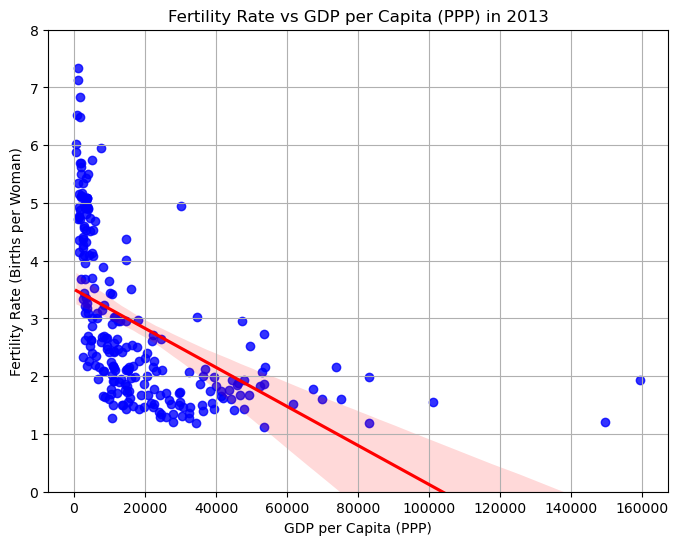

In [15]:

plt.figure(figsize=(8, 6))
sns.regplot(x=cleaned_data['gdp_per_capita'], y= cleaned_data["fertility_rate"], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Fertility Rate vs GDP per Capita (PPP) in 2013')
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Fertility Rate (Births per Woman)')
plt.grid()
plt.ylim(0, 8)
plt.show()


In [16]:
correlation = cleaned_data['gdp_per_capita'].corr(cleaned_data['fertility_rate'])
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: -0.5171011715833221


The calculated correlation coefficient of -0.517 indicates a moderate negative correlation between fertility rate (births per woman) and GDP per capita (PPP) for the year 2013.

### Question 4: Analyzing UK Monthly House Prices

In [19]:
monthly_average_house_price = pd.read_excel("Monthly Average House Price.xls")

In [20]:
monthly_average_house_price.head()

Unnamed: 0  Average House Price  INDEX Q1 1993=100  \
0 1991-01-01         53051.721106         105.832511   
1 1991-02-01         53496.798746         106.720393   
2 1991-03-01         52892.861606         105.515603   
3 1991-04-01         53677.435270         107.080744   
4 1991-05-01         54385.726747         108.493710   

   Seasonally Adjusted Index  Monthly % Change (SA)  Year % Change  \
0                 107.127299                    NaN            NaN   
1                 107.494996               0.003432            NaN   
2                 106.525649              -0.009018            NaN   
3                 107.126622               0.005642            NaN   
4                 107.266757               0.001308            NaN   

   Latest 3 months on previous 3 months  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

In [21]:
monthly_average_house_price = monthly_average_house_price.rename(columns = {"Unnamed: 0": "Date"})

In [22]:
monthly_average_house_price.head()

Date  Average House Price  INDEX Q1 1993=100  \
0 1991-01-01         53051.721106         105.832511   
1 1991-02-01         53496.798746         106.720393   
2 1991-03-01         52892.861606         105.515603   
3 1991-04-01         53677.435270         107.080744   
4 1991-05-01         54385.726747         108.493710   

   Seasonally Adjusted Index  Monthly % Change (SA)  Year % Change  \
0                 107.127299                    NaN            NaN   
1                 107.494996               0.003432            NaN   
2                 106.525649              -0.009018            NaN   
3                 107.126622               0.005642            NaN   
4                 107.266757               0.001308            NaN   

   Latest 3 months on previous 3 months  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

In [23]:
monthly_average_house_price['Date'] = pd.to_datetime(monthly_average_house_price['Date'])

start_date = '1991-01-01'
end_date = '2016-12-31'

# Trim the dataset based on the defined date range
monthly_average_house_price = monthly_average_house_price[
    (monthly_average_house_price['Date'] >= start_date) & 
    (monthly_average_house_price['Date'] <= end_date)
]

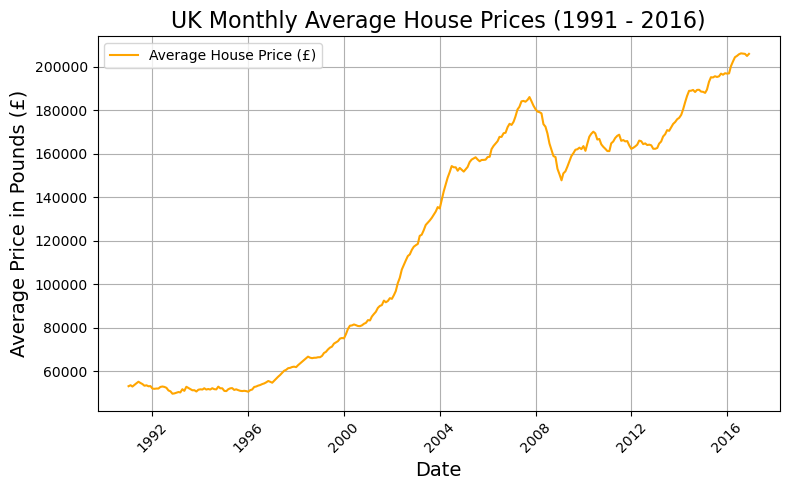

In [24]:
# Convert 'Date' column to datetime format
monthly_average_house_price['Date'] = pd.to_datetime(monthly_average_house_price['Date'], format='%Y-%m-%d')  # Ensure correct format for your date column

# Set 'Date' as index
monthly_average_house_price.set_index('Date', inplace=True)

# Plot the time series of average house prices
plt.figure(figsize=(8, 5))  # Set figure size for better visibility
plt.plot(monthly_average_house_price.index, monthly_average_house_price['Average House Price'], color='orange', label='Average House Price (£)')  # Plotting average prices

# Title and labels
plt.title('UK Monthly Average House Prices (1991 - 2016)', fontsize=16)  # Title of the plot
plt.xlabel('Date', fontsize=14)  # X-axis labeled as 'Date'
plt.ylabel('Average Price in Pounds (£)', fontsize=14)  # Y-axis label

# Additional plot features
plt.legend()  # Show legend
plt.grid(True)  # Add grid for easier reading
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Display the plot
plt.show()



In [25]:
def calculate_monthly_returns(data):
    """Calculate monthly returns using the formula r(t) = [p(t)/p(t-1)] - 1."""
    # Calculate monthly returns using the formula
    data['Monthly Returns'] = (data['Average House Price'] / data['Average House Price'].shift(1)) - 1
    return data


In [26]:
data = calculate_monthly_returns(monthly_average_house_price)

In [27]:
# Step 2: Plot ACF of Monthly Returns as a bar plot
def plot_acf_of_returns(data):
    """Plot the ACF of monthly returns as a bar plot."""
    
    # Drop NaN values in 'Monthly Returns' for ACF calculation
    monthly_returns = data['Monthly Returns'].dropna()

    # Calculate ACF values for the 'Monthly Returns' column
    acf_values = acf(monthly_returns, nlags=20)
    
    # Create a bar plot for the ACF values
    plt.figure(figsize=(8, 5))
    lags = np.arange(len(acf_values))
    
    # Plot ACF values as bars
    plt.bar(lags, acf_values, color='blue', alpha=0.6)
    
    # Add significance level lines (p < 0.05)
    significance_level = 1.96 / (len(monthly_returns) ** 0.5)
    plt.axhline(y=significance_level, color='red', linestyle='--', label='Significance Level (p<0.05)')
    plt.axhline(y=-significance_level, color='red', linestyle='--')
    
    # Customize plot
    plt.title('Autocorrelation Function (ACF) of Monthly Returns', fontsize=16)
    plt.xlabel('Lag (Months)', fontsize=14)
    plt.ylabel('ACF Value', fontsize=14)
    
    plt.legend()
    plt.show()

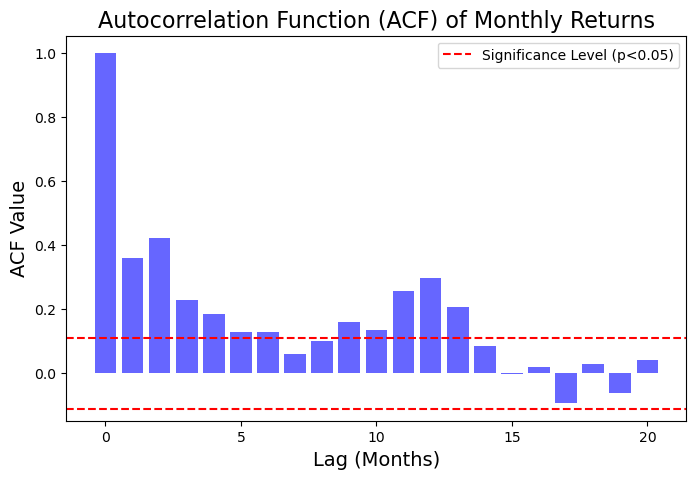

In [28]:
plot_acf_of_returns(data)

In [29]:
# Analyze seasonality and trend visually from the time series plot and ACF
# Calculate annualized return over the period
initial_price = monthly_average_house_price['Average House Price'].iloc[0]
final_price = monthly_average_house_price['Average House Price'].iloc[-1]
total_return = (final_price / initial_price) - 1
annualized_return = ((1 + total_return) ** (1 / (2016 - 1991))) - 1

# Convert annualized return to percentage format
annualized_return_housing = annualized_return * 100
print(f'Annualized Return from Jan 1991 to Dec 2016: {annualized_return_housing:.2f}%')


Annualized Return from Jan 1991 to Dec 2016: 5.57%


### Question 5: Analysis of FTSE 100 vs. UK House Prices

In [31]:
monthly_average_house_price.head()

Average House Price  INDEX Q1 1993=100  Seasonally Adjusted Index  \
Date                                                                            
1991-01-01         53051.721106         105.832511                 107.127299   
1991-02-01         53496.798746         106.720393                 107.494996   
1991-03-01         52892.861606         105.515603                 106.525649   
1991-04-01         53677.435270         107.080744                 107.126622   
1991-05-01         54385.726747         108.493710                 107.266757   

            Monthly % Change (SA)  Year % Change  \
Date                                               
1991-01-01                    NaN            NaN   
1991-02-01               0.003432            NaN   
1991-03-01              -0.009018            NaN   
1991-04-01               0.005642            NaN   
1991-05-01               0.001308            NaN   

            Latest 3 months on previous 3 months  Monthly Returns  
Date                                                               
1991-01-01                                   NaN              NaN  
1991-02-01                                   NaN         0.008390  
1991-03-01                                   NaN        -0.011289  
1991-04-01                                   NaN         0.014833  
1991-05-01                                   NaN         0.013195

In [32]:
monthly_average_house_price.sort_values(by = "Date")

Average House Price  INDEX Q1 1993=100  Seasonally Adjusted Index  \
Date                                                                            
1991-01-01         53051.721106         105.832511                 107.127299   
1991-02-01         53496.798746         106.720393                 107.494996   
1991-03-01         52892.861606         105.515603                 106.525649   
1991-04-01         53677.435270         107.080744                 107.126622   
1991-05-01         54385.726747         108.493710                 107.266757   
...                         ...                ...                        ...   
2016-08-01        206144.961815         411.237157                 409.465432   
2016-09-01        206014.691677         410.977282                 410.292238   
2016-10-01        205904.191651         410.756846                 410.256066   
2016-11-01        204947.430028         408.848209                 410.018088   
2016-12-01        205897.846011         410.744187                 412.912278   

            Monthly % Change (SA)  Year % Change  \
Date                                               
1991-01-01                    NaN            NaN   
1991-02-01               0.003432            NaN   
1991-03-01              -0.009018            NaN   
1991-04-01               0.005642            NaN   
1991-05-01               0.001308            NaN   
...                           ...            ...   
2016-08-01               0.007744       0.055643   
2016-09-01               0.002019       0.053326   
2016-10-01              -0.000088       0.046223   
2016-11-01              -0.000580       0.044025   
2016-12-01               0.007059       0.045171   

            Latest 3 months on previous 3 months  Monthly Returns  
Date                                                               
1991-01-01                                   NaN              NaN  
1991-02-01                                   NaN         0.008390  
1991-03-01                                   NaN        -0.011289  
1991-04-01                                   NaN         0.014833  
1991-05-01                                   NaN         0.013195  
...                                          ...              ...  
2016-08-01                              0.009269         0.002089  
2016-09-01                              0.010542        -0.000632  
2016-10-01                              0.011086        -0.000536  
2016-11-01                              0.008036        -0.004647  
2016-12-01                              0.005799         0.004637  

[312 rows x 7 columns]

In [33]:
#Load the financial_times_stock_exchange_data
financial_times_stock_exchange_data = pd.read_csv("FTSE100.csv")
# Convert 'Date' column to datetime format
financial_times_stock_exchange_data['Date'] = pd.to_datetime(financial_times_stock_exchange_data['Date'])

# Set 'Date' as the index
financial_times_stock_exchange_data.set_index('Date', inplace=True)

In [34]:

# Display the first few rows to verify
financial_times_stock_exchange_data.head()


Open     High      Low    Close     Volume  Adj Close
Date                                                                
2016-12-01  6783.79  6789.30  6688.41  6752.93  966722048    6752.93
2016-11-01  6954.22  6993.79  6903.61  6917.14  780871680    6917.14
2016-10-03  6899.33  6996.43  6898.09  6983.52  745408640    6983.52
2016-09-01  6781.51  6826.22  6723.21  6745.97  991756480    6745.97
2016-08-01  6724.43  6769.41  6678.45  6693.95  727709696    6693.95

In [35]:
# Reverse the entire DataFrame and keep the same dataset name
#financial_times_stock_exchange_data = financial_times_stock_exchange_data[::-1]
financial_times_stock_exchange_data = financial_times_stock_exchange_data.sort_values(by = "Date")
financial_times_stock_exchange_data.head()

Open         High          Low        Close  Volume  \
Date                                                                     
1991-01-01  2143.500000  2182.100098  2052.300049  2170.300049       0   
1991-02-01  2168.500000  2388.399902  2155.600098  2380.899902       0   
1991-03-01  2374.899902  2527.100098  2368.399902  2456.500000       0   
1991-04-01  2456.500000  2555.300049  2438.600098  2486.199951       0   
1991-05-01  2487.399902  2554.899902  2444.600098  2499.500000       0   

              Adj Close  
Date                     
1991-01-01  2170.300049  
1991-02-01  2380.899902  
1991-03-01  2456.500000  
1991-04-01  2486.199951  
1991-05-01  2499.500000

In [36]:
# Calculate monthly returns for house prices using pct_change()
monthly_average_house_price['Returns'] = monthly_average_house_price['Average House Price'].pct_change()

# Calculate returns for FTSE 100 Index using pct_change() on adjusted close prices
financial_times_stock_exchange_data['Returns'] = financial_times_stock_exchange_data['Adj Close'].pct_change()

# Drop any rows with NaN values due to the shift
monthly_average_house_price.dropna(subset=['Returns'], inplace=True)
financial_times_stock_exchange_data.dropna(subset=['Returns'], inplace=True)

In [37]:
# Calculate cumulative returns using cumsum() for house prices (Simple cumulative returns, not compounded)
monthly_average_house_price['Cumulative Returns'] = monthly_average_house_price['Returns'].cumsum()

# Calculate cumulative returns using cumsum() for FTSE 100 Index (Simple cumulative returns, not compounded)
financial_times_stock_exchange_data['Cumulative Returns'] = financial_times_stock_exchange_data['Returns'].cumsum()


In [38]:
# Normalize cumulative returns to start at 100 for house prices
initial_house_price_value = monthly_average_house_price['Cumulative Returns'].iloc[0]
monthly_average_house_price['Normalized Cumulative Returns'] = (monthly_average_house_price['Cumulative Returns'] / initial_house_price_value) * 100

# Normalize cumulative returns to start at 100 for FTSE Index
initial_ftse_value = financial_times_stock_exchange_data['Cumulative Returns'].iloc[0]
financial_times_stock_exchange_data['Normalized Cumulative Returns'] = (financial_times_stock_exchange_data['Cumulative Returns'] / initial_ftse_value) * 100


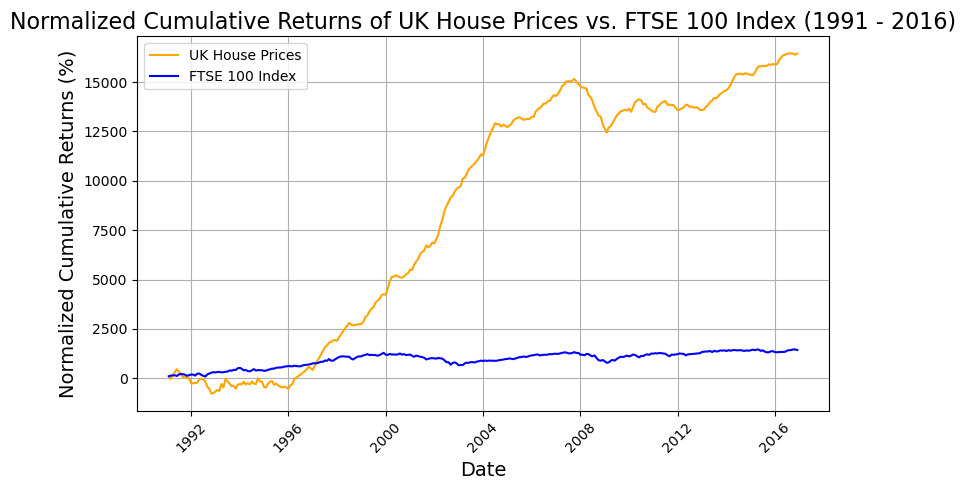

In [39]:

# Plot Normalized Cumulative Returns
plt.figure(figsize=(8, 5))
plt.plot(monthly_average_house_price.index, monthly_average_house_price['Normalized Cumulative Returns'], label='UK House Prices', color='orange')
plt.plot(financial_times_stock_exchange_data.index, financial_times_stock_exchange_data['Normalized Cumulative Returns'], label='FTSE 100 Index', color='blue')

plt.title('Normalized Cumulative Returns of UK House Prices vs. FTSE 100 Index (1991 - 2016)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Cumulative Returns (%)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Get initial and final FTSE values
initial_ftse_value = financial_times_stock_exchange_data['Adj Close'].iloc[0]
final_ftse_value = financial_times_stock_exchange_data['Adj Close'].iloc[-1]

# Calculate number of years for the period
n_years = (financial_times_stock_exchange_data.index[-1] - financial_times_stock_exchange_data.index[0]).days / 365.25

# Calculate annualized return for FTSE Index
annualized_return_ftse = ((final_ftse_value / initial_ftse_value) ** (1 / n_years)) - 1

# Print annualized return as a percentage
print(f"Annualized Return for FTSE 100: {annualized_return_ftse * 100:.2f}%")

Annualized Return for FTSE 100: 4.12%


In [41]:

# Investment Comparison
if annualized_return_housing > annualized_return_ftse:
    print("Investing in UK houses would have yielded better returns than investing in the UK stock market.")
else:
    print("Investing in the UK stock market would have yielded better returns than investing in UK houses.")

Investing in UK houses would have yielded better returns than investing in the UK stock market.
